# สอนความสัมพันธ์ ZR แปลงค่า Z เป็น dBZ 

In [1]:
import math
import numpy as np

## ทำความเข้าใจ ZR แต่ละแบบ
https://wx.erau.edu/faculty/mullerb/Wx365/Radar_equation/radar_equation.pdf
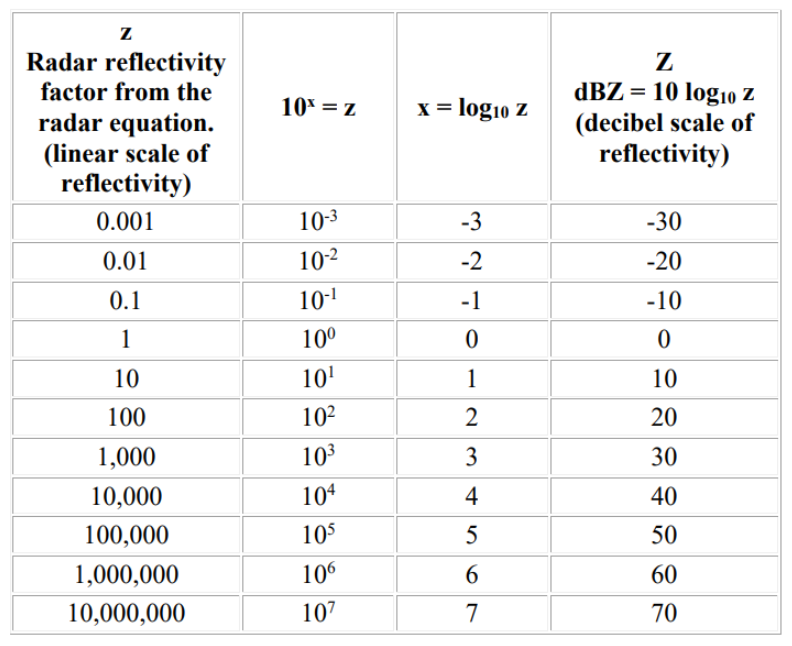

https://severeweather.wmo.int/TCFW/RAIV_Workshop2017/11_Radar_StaceySteward.pdf
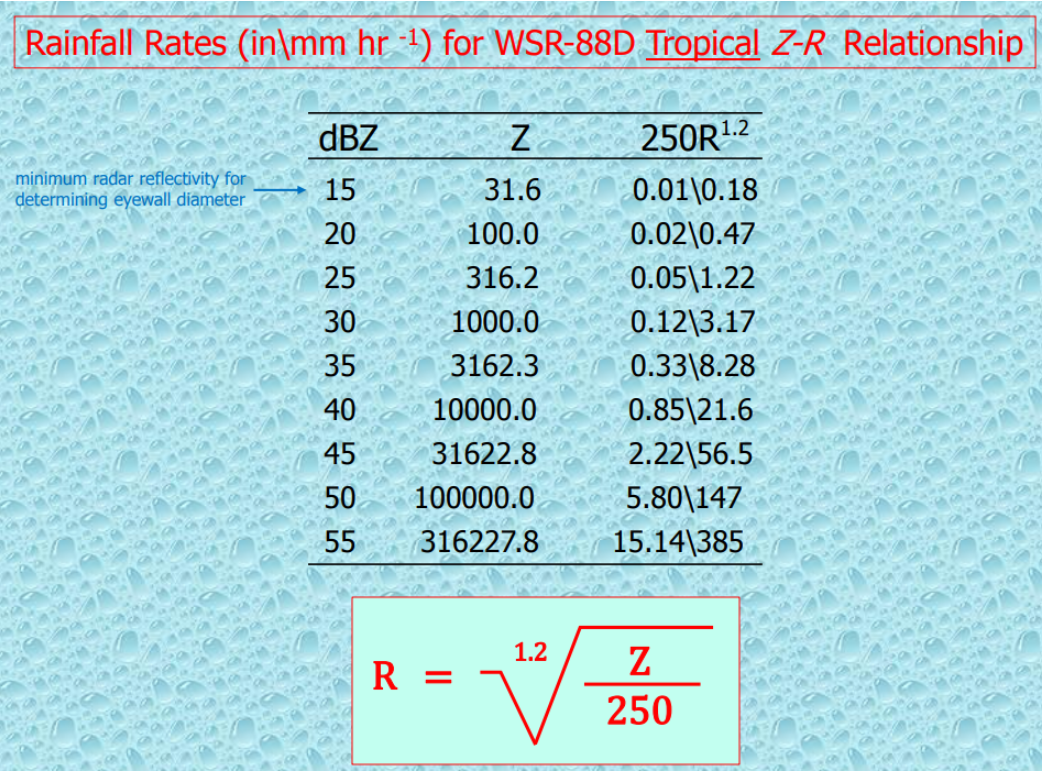

### แปลงค่า Z ไปเป็น dBZ

In [2]:
## z raw reflectivity [ mm^6 / m^3]
z = np.array([0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000, 10000000,100000000]) # ค่า raw reflectivity 

In [3]:
print(z)

[1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04 1.e+05 1.e+07
 1.e+08]


In [4]:
# z >>> dBZ
# Z = dBZ
Z0 = math.log10(z[0]) 
print(10*Z0, 'dB')

-30.0 dB


In [5]:
print(10*math.log10(z[-1]),'dB')

80.0 dB


In [6]:
z[-2]

10000000.0

In [7]:
print(10*math.log10(z[-2]),'dB')

70.0 dB


In [8]:
print(10*math.log10(z[-1]),'dB')

80.0 dB


In [9]:
def Z_to_dBZ(z):
    return 10*math.log10(z)

In [10]:
print(Z_to_dBZ(z[0]),' dB')

-30.0  dB


In [11]:
z

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+07, 1.e+08])

In [12]:
vfunc = np.vectorize(Z_to_dBZ)
vfunc(z)


array([-30., -20., -10.,   0.,  10.,  20.,  30.,  40.,  50.,  70.,  80.])

## แปลง dBz ไปเป็น z 

In [13]:
2**3

8

In [14]:
#dBZ = 10 *math.log10(z)
#z = 10**(dBZ/10)
dBZ= 50
z = 10**(dBZ/10)
print(z, 'mm^6/m^3')


100000.0 mm^6/m^3


In [15]:
def dBZ_to_Z(dBZ):
    return 10**(dBZ/10)

In [16]:
dBZ = 40
print( dBZ_to_Z(55), 'mm^6/m^3')

316227.7660168379 mm^6/m^3


In [17]:
dBZ = np.array([-30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70])
dBZ_to_Z(dBZ)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04,
       1.e+05, 1.e+06, 1.e+07])

## ความสัมพันธ์ ZR relationship

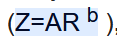

In [18]:
# z = a*r**b 
# z = 200*r**1.6 #mashall palmer >>> ฝนปรอยถึงปานกลาง ไม่หนัก
# z = 250*r**1.2 #rosenfeld ฝนฟ้าคะนองในเขตร้อน
# z = 300*r**1.4 #summer deep convection >> เมฆพาความร้อนในช่วงฤดูร้อนของละติจูดกลาง

กระบวนการแปลง dBz เป็นฝนเรดาร์ประมาณค่า R
1. แปลง dBz ไปเป็น z
2. แปลงสมการ zr เพื่อหาค่า r โดย 


In [19]:
'''
## marshall palmer
a = 200
b = 1.6
dBZ = 10

z = 10**(dBZ/10)
r = (z/a)**(1/b)
print(r)
'''

'\n## marshall palmer\na = 200\nb = 1.6\ndBZ = 10\n\nz = 10**(dBZ/10)\nr = (z/a)**(1/b)\nprint(r)\n'

ตรวจสอบคำตอบของการแปลง dBz เป็น ฝนประมาณค่า rainrate หรือ r จากความสัมพันธ์ z-r
https://docs.wradlib.org/en/stable/notebooks/basics/wradlib_get_rainfall.html

In [20]:
def dBZ_to_rainrate_by_zr(dBZ, a=200, b=1.6):
    z = 10**(dBZ/10)
    r = (z/a)**(1/b)
    return r

In [21]:
dBz = np.array([10.0, 20.0, 30.0, 40.0, 45.0, 50.0, 55.0])

In [22]:
print('marshall&palmer:', dBZ_to_rainrate_by_zr(dBZ))

marshall&palmer: [4.86246236e-04 2.05048338e-03 8.64681670e-03 3.64633237e-02
 1.53764561e-01 6.48419777e-01 2.73436353e+00 1.15307154e+01
 4.86246236e+01 2.05048338e+02 8.64681670e+02]


In [23]:
print('Rosenfeld:', dBZ_to_rainrate_by_zr(dBZ, a=250, b=1.2))

Rosenfeld: [3.17480210e-05 2.16296749e-04 1.47361260e-03 1.00396058e-02
 6.83990379e-02 4.65997220e-01 3.17480210e+00 2.16296749e+01
 1.47361260e+02 1.00396058e+03 6.83990379e+03]


In [24]:
print('summer deep convection:', dBZ_to_rainrate_by_zr(dBZ, a=300, b=1.4))

summer deep convection: [1.22396932e-04 6.33951811e-04 3.28353735e-03 1.70069986e-02
 8.80873185e-02 4.56246036e-01 2.36311479e+00 1.22396932e+01
 6.33951811e+01 3.28353735e+02 1.70069986e+03]


In [25]:
for rf in dBZ:
    print(rf)

-30
-20
-10
0
10
20
30
40
50
60
70
